In [1]:
import os
import cv2
import torch
import pickle
import scipy.io
import numpy as np
import pandas as pd
from scipy.misc import face
from scipy.ndimage import zoom
import matplotlib.pyplot as plt
from scipy.special import logsumexp
from scipy.stats import pearsonr, spearmanr

In [2]:
import os

def create_folder(folder_path):
    try:
        os.mkdir(folder_path)
        print(f"Folder '{folder_path}' created successfully.")
    except FileExistsError:
        print(f"Folder '{folder_path}' already exists.")
    except Exception as e:
        print(f"An error occurred: {e}")

In [3]:
import os

def folder_exists(folder_path):
    return os.path.exists(folder_path) and os.path.isdir(folder_path)


In [4]:
def add_circles(matrix, x_list, y_list, r_list):
    for x, y, r in zip(x_list, y_list, r_list):
        x, y, r = int(x), int(y), int(r)
        for i in range(max(0, y - r), min(matrix.shape[0], y + r + 1)):
            for j in range(max(0, x - r), min(matrix.shape[1], x + r + 1)):
                if (i - y) ** 2 + (j - x) ** 2 <= r ** 2:
                    matrix[i][j] += 1
    return matrix

Folder '/home/pranjul/DeepGaze/Bachelorarbeit_Christine_Huschens_(1)/DG3_HG_heatmaps_c/S04_fix_c' created successfully.
FA_Block1.mat
[3]
Folder '/home/pranjul/DeepGaze/Bachelorarbeit_Christine_Huschens_(1)/DG3_HG_heatmaps_c/S04_fix_c/pareidolia' created successfully.


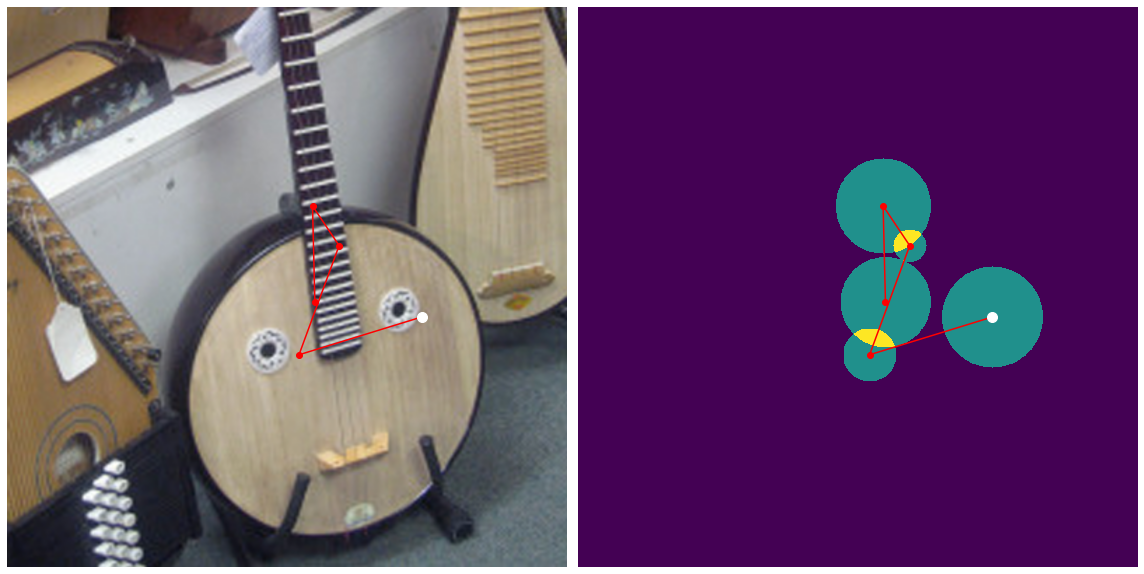

[]
Folder '/home/pranjul/DeepGaze/Bachelorarbeit_Christine_Huschens_(1)/DG3_HG_heatmaps_c/S04_fix_c/pareidolia_inv' created successfully.


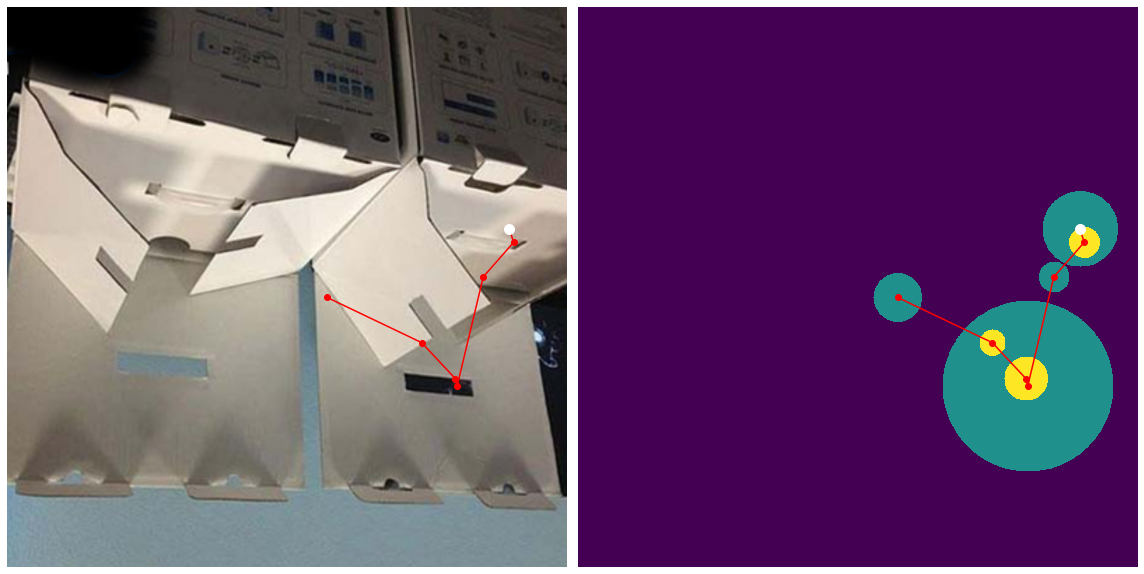

[]
Folder '/home/pranjul/DeepGaze/Bachelorarbeit_Christine_Huschens_(1)/DG3_HG_heatmaps_c/S04_fix_c/faces' created successfully.


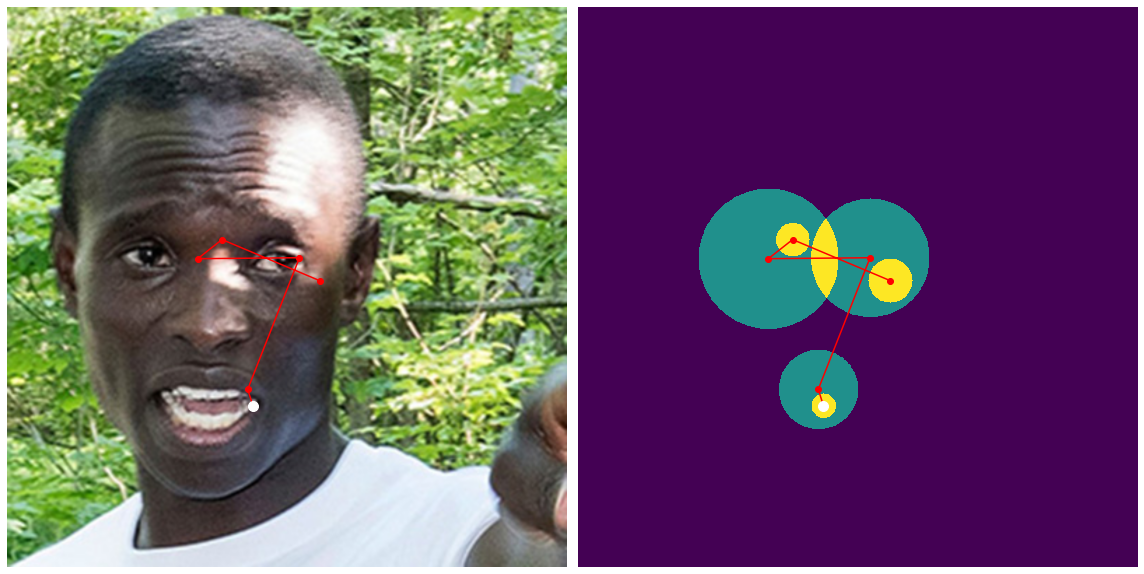

[]
Folder '/home/pranjul/DeepGaze/Bachelorarbeit_Christine_Huschens_(1)/DG3_HG_heatmaps_c/S04_fix_c/objects' created successfully.


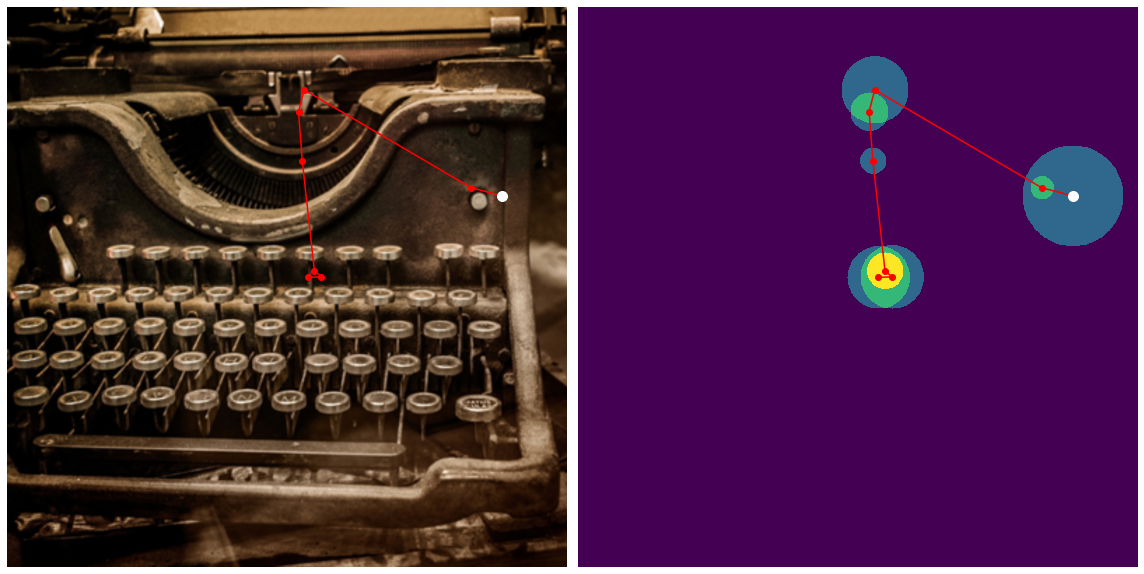

[]
Folder '/home/pranjul/DeepGaze/Bachelorarbeit_Christine_Huschens_(1)/DG3_HG_heatmaps_c/S04_fix_c/pareidolia_inv' already exists.


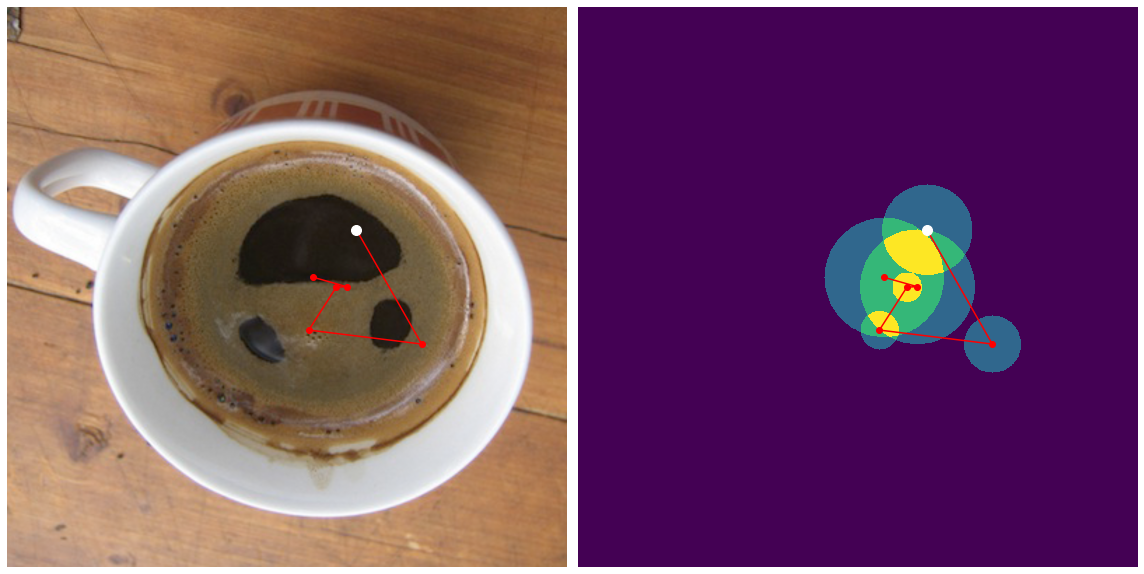

[]
Folder '/home/pranjul/DeepGaze/Bachelorarbeit_Christine_Huschens_(1)/DG3_HG_heatmaps_c/S04_fix_c/pareidolia' already exists.


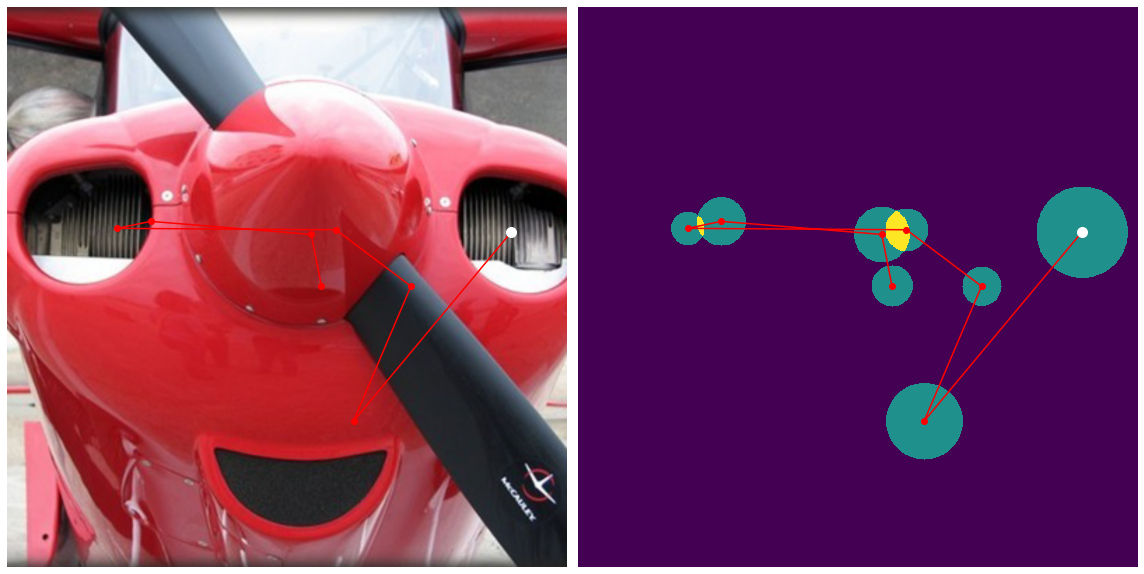

[]
Folder '/home/pranjul/DeepGaze/Bachelorarbeit_Christine_Huschens_(1)/DG3_HG_heatmaps_c/S04_fix_c/pareidolia_art' created successfully.


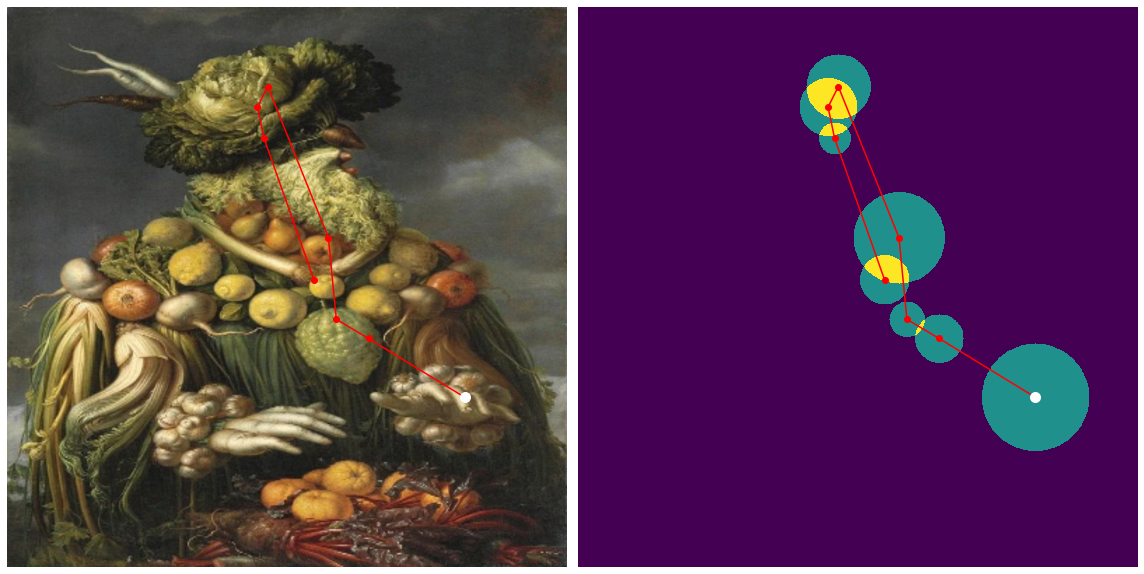

[]
Folder '/home/pranjul/DeepGaze/Bachelorarbeit_Christine_Huschens_(1)/DG3_HG_heatmaps_c/S04_fix_c/objects_inv' created successfully.


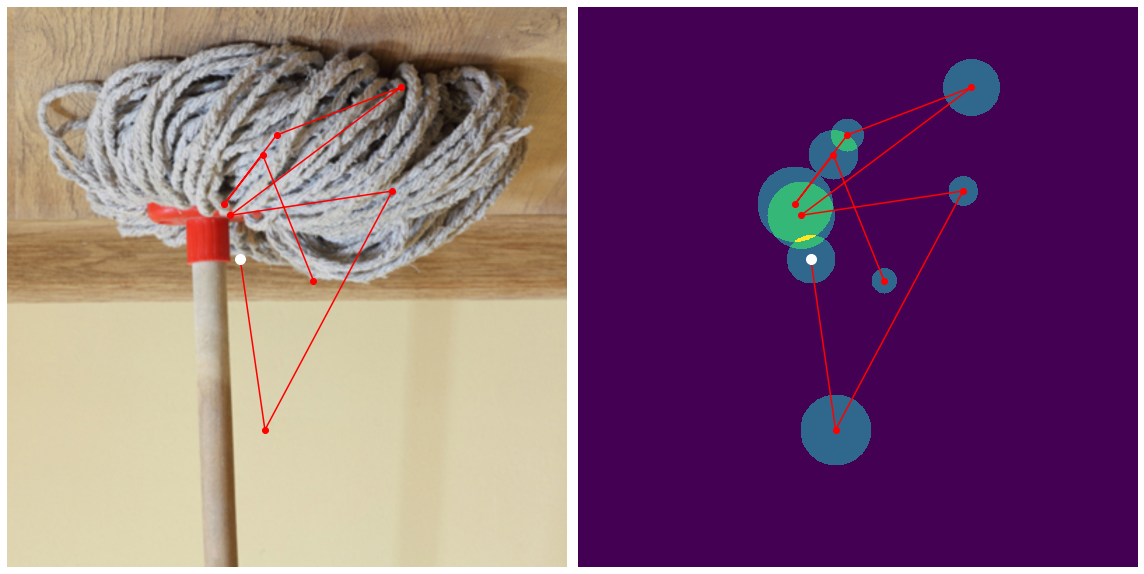

[]
Folder '/home/pranjul/DeepGaze/Bachelorarbeit_Christine_Huschens_(1)/DG3_HG_heatmaps_c/S04_fix_c/faces_inv' created successfully.


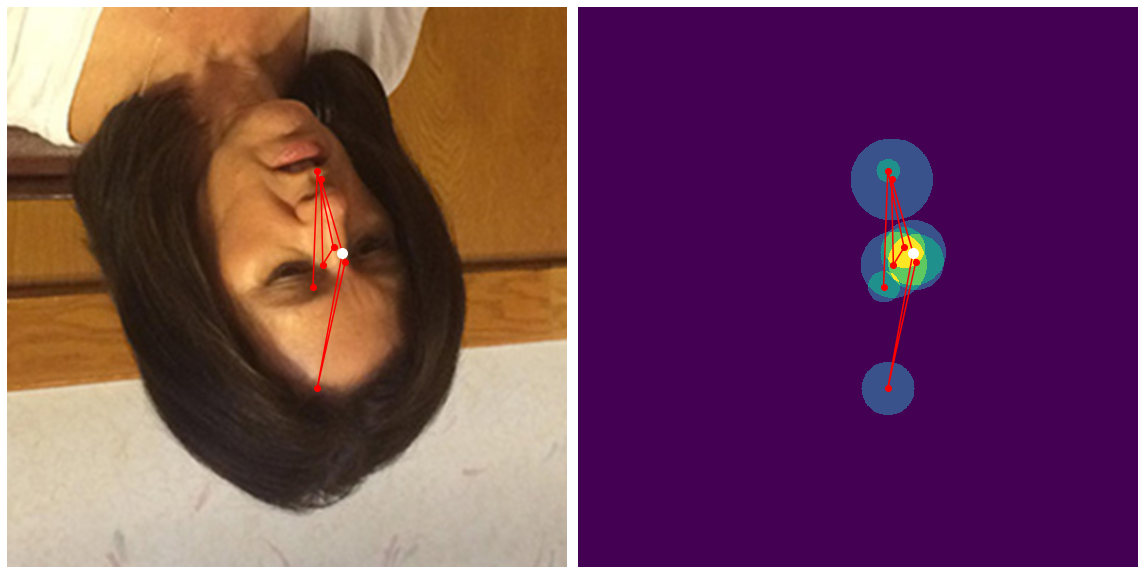

[5]
Folder '/home/pranjul/DeepGaze/Bachelorarbeit_Christine_Huschens_(1)/DG3_HG_heatmaps_c/S04_fix_c/objects_inv' already exists.


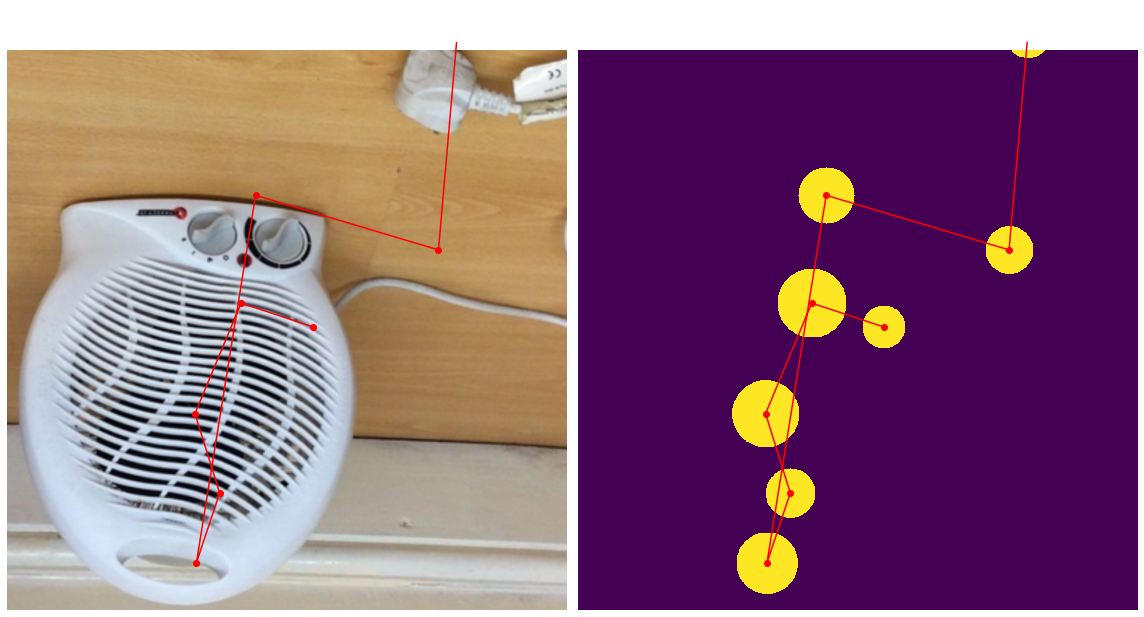

[]
Folder '/home/pranjul/DeepGaze/Bachelorarbeit_Christine_Huschens_(1)/DG3_HG_heatmaps_c/S04_fix_c/pareidolia_inv' already exists.


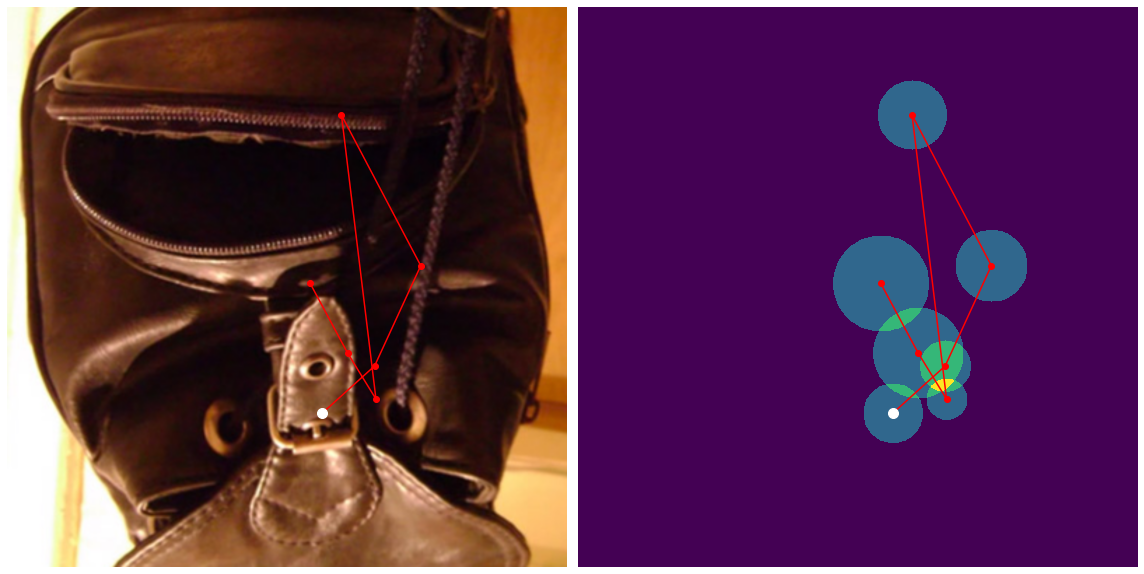

[]
Folder '/home/pranjul/DeepGaze/Bachelorarbeit_Christine_Huschens_(1)/DG3_HG_heatmaps_c/S04_fix_c/pareidolia_inv' already exists.


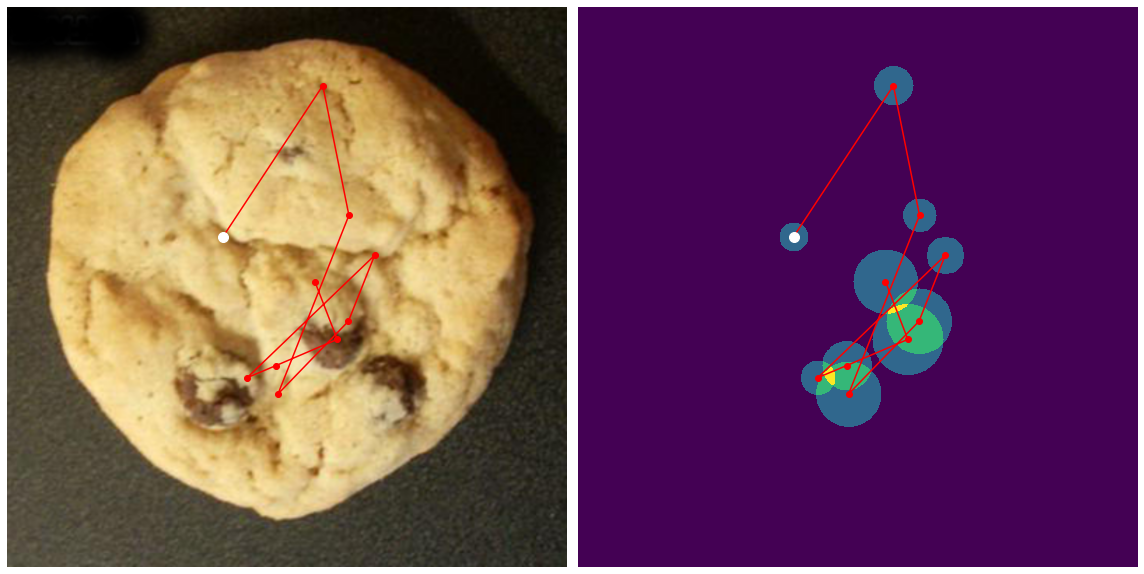

[]
Folder '/home/pranjul/DeepGaze/Bachelorarbeit_Christine_Huschens_(1)/DG3_HG_heatmaps_c/S04_fix_c/objects_inv' already exists.


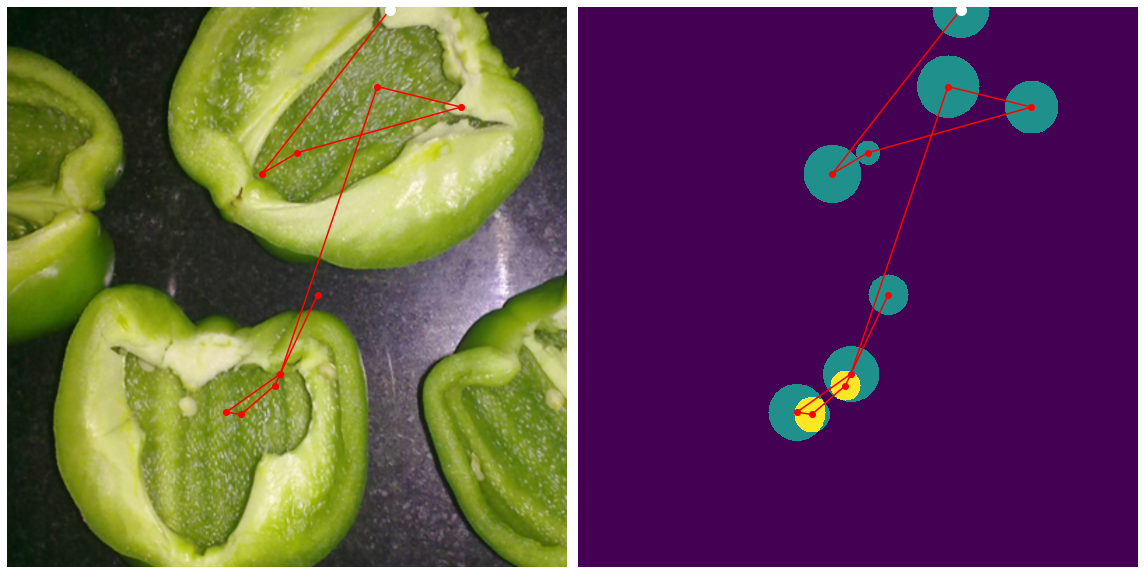

[]
Folder '/home/pranjul/DeepGaze/Bachelorarbeit_Christine_Huschens_(1)/DG3_HG_heatmaps_c/S04_fix_c/pareidolia_art_inv' created successfully.


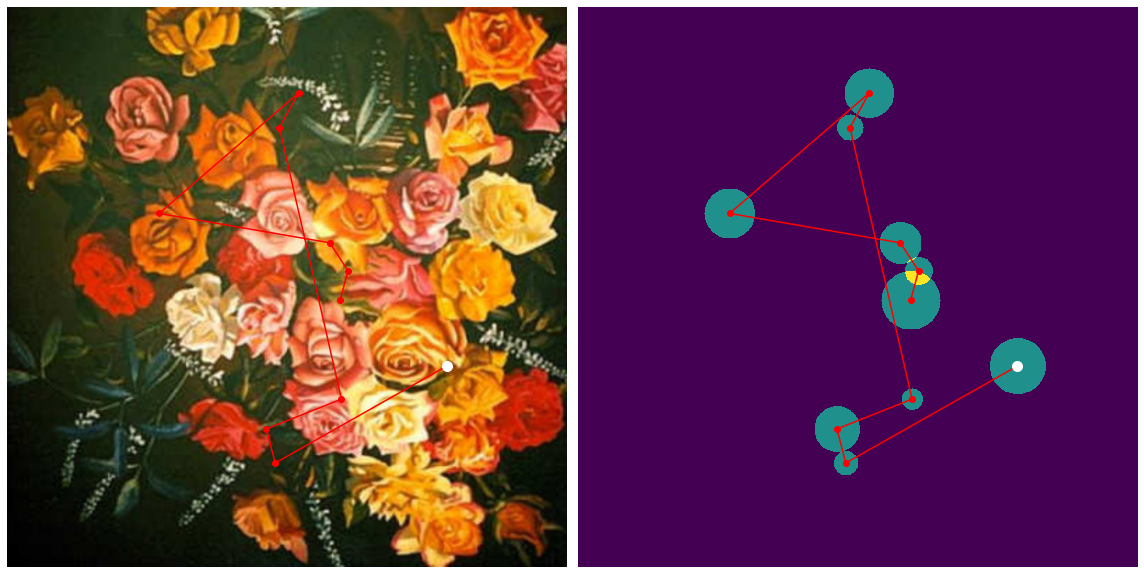

[]
Folder '/home/pranjul/DeepGaze/Bachelorarbeit_Christine_Huschens_(1)/DG3_HG_heatmaps_c/S04_fix_c/pareidolia_art_inv' already exists.


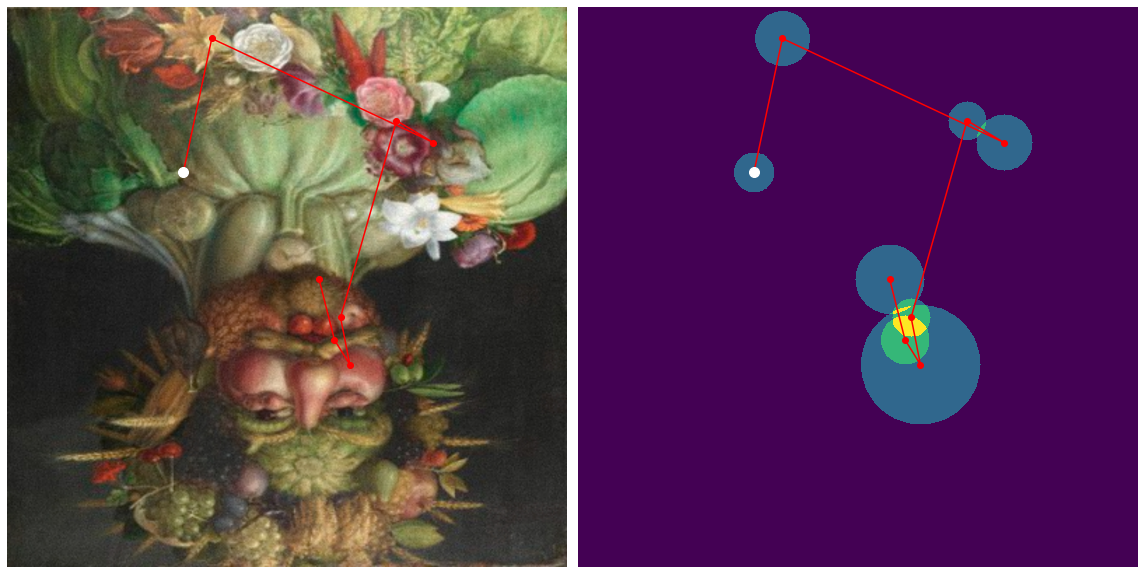

KeyboardInterrupt: 

In [5]:

for q in range(1, 50):
    
    #x = []
    
    if q < 10:
        sq = 'S0' + str(q)
    else:
        sq = 'S' + str(q)
    
    # Replace 'path/to/your/folder' with the folder path you want to check
    folder_path = '/home/pranjul/DeepGaze/Bachelorarbeit_Christine_Huschens_(1)/results/' + sq
    
    if folder_exists(folder_path):
    
        #fix_X, fix_Y, radius, img_name = load_fix_from_folder('S_fix/S'+ str(q) +'_fix')

        # Replace 'path/to/your/folder' with the desired folder path
        folder_path = '/home/pranjul/DeepGaze/Bachelorarbeit_Christine_Huschens_(1)/DG3_HG_heatmaps_c/' + sq +'_fix_c'
        create_folder(folder_path)

        for file in sorted(os.listdir('/home/pranjul/DeepGaze/Bachelorarbeit_Christine_Huschens_(1)/results/' + sq)):
            if 'Block' in file:
                print(file)        

                fn = '/home/pranjul/DeepGaze/Bachelorarbeit_Christine_Huschens_(1)/results/' + sq + '/' + file

                for i in range(64):
                    gavx, gavy, sttime, entime = [], [], [], []

                    for j in range(len(scipy.io.loadmat(fn)['Results']['FixData'][0][0][0][i][0])):
                        gavx.append(scipy.io.loadmat(fn)['Results']['FixData'][0][0][0][i][0][j][18][0][0])
                        gavy.append(scipy.io.loadmat(fn)['Results']['FixData'][0][0][0][i][0][j][19][0][0])
                        sttime.append(scipy.io.loadmat(fn)['Results']['FixData'][0][0][0][i][0][j][4][0][0])
                        entime.append(scipy.io.loadmat(fn)['Results']['FixData'][0][0][0][i][0][j][5][0][0])

                    fixendtimes       = scipy.io.loadmat(fn)['Results']['FixEndTimes'][0][0][0][i][0]
                    stim_image_name   = scipy.io.loadmat(fn)['Results']['ImPath'][0][0][0][i][0].split('\\')[-1]
                    stim_folder_name  = scipy.io.loadmat(fn)['Results']['ImPath'][0][0][0][i][0].split('\\')[-2]

                    #break

                    gavx   = np.array(gavx)
                    gavy   = np.array(gavy)
                    sttime = np.array(sttime)
                    entime = np.array(entime)

                    res_width   = scipy.io.loadmat(fn)['Results']['Disp'][0][0][0][0][2][0][0][0][0][0]
                    res_height  = scipy.io.loadmat(fn)['Results']['Disp'][0][0][0][0][2][0][0][1][0][0]
                    ImWidth     = scipy.io.loadmat(fn)['Results']['ImWidth'][0][0][0][0]
                    ImHeight    = scipy.io.loadmat(fn)['Results']['ImHeight'][0][0][0][0]

                    FixX = np.round(gavx) - (res_width/2) + (ImWidth/2)
                    FixY = np.round(gavy) - (res_height/2) + (ImHeight/2)
                    FixDur = entime - sttime
                    FixOnset = fixendtimes - FixDur + FixDur
                    
                    #print(FixDur)
                    #print(FixOnset)
                    dur_indices = np.where(FixDur < 100)[0]
                    onset_indices = np.where(FixOnset < 0)[0]

                    exclude_ind = np.unique(np.concatenate([dur_indices, onset_indices]))
        
                    print(exclude_ind)
                    FixX = np.delete(FixX, exclude_ind)
                    FixY = np.delete(FixY, exclude_ind)
                    FixDur = np.delete(FixDur, exclude_ind)
                    FixOnset = np.delete(FixOnset, exclude_ind)        
            
                    image = cv2.imread('/home/pranjul/DeepGaze/Bachelorarbeit_Christine_Huschens_(1)/stimuli/' + stim_folder_name + '/' + stim_image_name)
                    create_folder(os.path.join(folder_path, stim_folder_name))
                    
                    #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                    image = cv2.resize(image, (ImWidth, ImHeight))             
                
                    if image is not None and len(FixX) > 3 and len(FixY > 3):


                        fixation_history_x = FixX
                        #print(fixation_history_x)
                        fixation_history_y = FixY
                        #radius_history = radius[i]/5

                        #print(fixation_history_x, fixation_history_y, radius_history)

                        # Create a 2D matrix filled with zeros of size (600, 800)
                        matrix_size = (ImWidth, ImHeight)
                        matrix = np.zeros(matrix_size, dtype=int)

                        # Call the function to add circles to the matrix
                        result_matrix = add_circles(matrix, FixX, FixY, FixDur/5)

                        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

                        f, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 9))
                        axs[0].imshow(image)
                        axs[0].plot(fixation_history_x, fixation_history_y, 'o-', color='red')
                        axs[0].scatter(fixation_history_x[-1], fixation_history_y[-1], 100, color='white', zorder=100)
                        axs[0].set_axis_off()
                        axs[1].matshow(result_matrix)
                        axs[1].plot(fixation_history_x, fixation_history_y, 'o-', color='red')
                        axs[1].scatter(fixation_history_x[-1], fixation_history_y[-1], 100, color='white', zorder=100)
                        axs[1].set_axis_off()
                        plt.tight_layout()
                        #plt.savefig(os.path.join(folder_path, stim_folder_name, stim_image_name.split('.')[0] + '.png'))
                        plt.show()
                        #plt.close()
                    #break
                break
            #break